In [236]:
import os
import sys
sys.path.append(os.path.abspath('../../..')) 
from plotting_utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

%matplotlib inline
set_matplotlib_style()

In [237]:
data_path = 'data/model-free-minigrid-all-params_data.csv'
df = pd.read_csv(data_path, index_col=0)
df['Model Type'] = df['ae_model_type']


model_type_map = {
  'ae': 'Continuous',
  'vqvae': 'Discrete',
  'fta_ae': 'FTA',
  'softmax_ae': 'Softmax AE',
}
df['Model Type'] = df['Model Type'].apply(lambda x: model_type_map[x])
df['Model Type'] = df.apply(
  (lambda x: x['Model Type'] if x['ae_recon_loss'] else 'End-to-End'), axis=1)

# Remove all softmax
df = df[df['ae_model_type'] != 'softmax_ae']


Average Performance

In [238]:
# df = df.drop('experiment_key', axis=1)
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const', 'experiment_key']

df = df[df['step'] >= 500000]

average_df = df.groupby(params, as_index=False).mean()

average_df

,ae_model_type,ae_recon_loss,beta,codebook_size,count,env_name,filter_size,learning_rate,rl_start_step,Model Type,ppo_entropy_coef,agg_func_const,experiment_key,step,ep_length,ep_reward,reward,entropy
0,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,0ead4a0d92524014aa80043ae2537d79,750000.0,109.971343,0.895647,0.037053,2.665689
1,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,108687ecbeb64ee787a1449ea83536e4,750000.0,132.728477,0.871906,0.038223,2.694600
2,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,1a71eec8f9974032959734395dd1e798,695000.0,238.284702,0.769990,0.031484,2.796830
3,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,29c00e39246343dbb53b256daa730188,750000.0,190.875791,0.816544,0.033123,2.778743
4,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,2a6ee56aece84b97b716bbc77d848578,750000.0,153.263889,0.854025,0.035970,2.729733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,e032777b9e7c420fa92a1d72e0837143,750000.0,947.890196,0.063417,0.000387,3.794944
2381,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,f2164674790f46be826b008d34ee7586,750000.0,939.844118,0.072168,0.000396,3.810793
2382,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,f71aa6e633d94377849136d7406e4062,750000.0,939.149760,0.072213,0.004256,3.809450
2383,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,f8089bf8fbfe47b8bc56fec7226e3a1c,750000.0,935.872133,0.076827,0.000403,3.799218


('minigrid-door-key-stochastic', 3e-05)
3e-05


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/2141057041.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


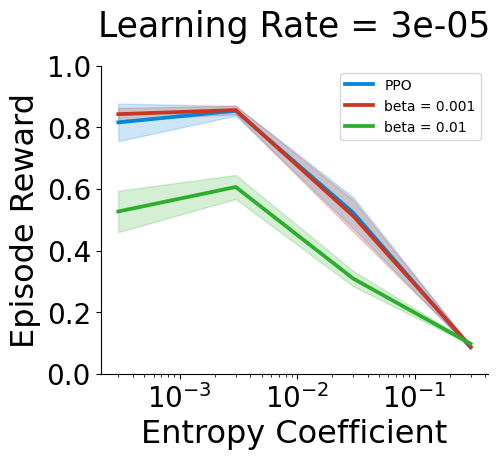

('minigrid-door-key-stochastic', 0.0003)
0.0003


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/2141057041.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


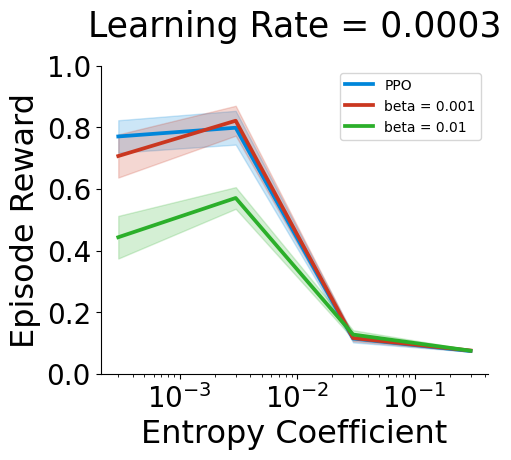

('minigrid-door-key-stochastic', 0.003)
0.003


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/2141057041.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


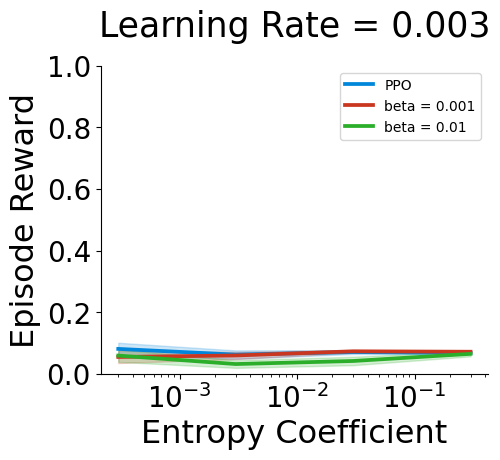

In [239]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}
agg_func_const = 100
determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.0001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['agg_func_const'].isin([agg_func_const])
                              | (determ_env_df['agg_func_const'].isin([0.0]) & determ_env_df['beta'].isin([0.0]))]


set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate']):
  print(env_name)
  learning_rate = env_name[1]
  print(learning_rate)
  env_name = env_name[0]

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['beta']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='ppo_entropy_coef', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate = " + str(learning_rate))
  # set_fig_labels('Time Steps', 'Episode Length', xsci=True)
  plt.xscale('log')

  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, 1)
  plt.xlim(0, )

  plt.ylabel("Episode Reward")
  plt.xlabel("Entropy Coefficient")
   
  plt.legend(loc='upper right')



  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

In [240]:
average_df[average_df['agg_func_const'] == 100.0]

,ae_model_type,ae_recon_loss,beta,codebook_size,count,env_name,filter_size,learning_rate,rl_start_step,Model Type,ppo_entropy_coef,agg_func_const,experiment_key,step,ep_length,ep_reward,reward,entropy
404,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,100.0,00483610ff7244d7beec514131049e5b,750000.0,190.618113,0.815497,0.035582,2.794892
405,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,100.0,294c6c169c2647b3b7f0fc4adc390287,750000.0,119.502472,0.887174,0.039752,2.739194
406,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,100.0,2eec5d1094a14642b806471a63727272,750000.0,193.325371,0.813350,0.036980,2.803420
407,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,100.0,2f2a2ce55dd5458b9e105fd2f9ee4969,750000.0,204.156647,0.801175,0.033140,2.789129
408,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,100.0,42a3f905b7e64f019566a49f2ecded29,750000.0,232.902549,0.776697,0.033851,2.845094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,vqvae,True,0.010,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,e032777b9e7c420fa92a1d72e0837143,750000.0,947.890196,0.063417,0.000387,3.794944
2381,vqvae,True,0.010,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,f2164674790f46be826b008d34ee7586,750000.0,939.844118,0.072168,0.000396,3.810793
2382,vqvae,True,0.010,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,f71aa6e633d94377849136d7406e4062,750000.0,939.149760,0.072213,0.004256,3.809450
2383,vqvae,True,0.010,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,f8089bf8fbfe47b8bc56fec7226e3a1c,750000.0,935.872133,0.076827,0.000403,3.799218


('minigrid-door-key-stochastic', 3e-05, 0.0003)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
0            vqvae           True  0.00            256   True   
1            vqvae           True  0.00            256   True   
2            vqvae           True  0.00            256   True   
3            vqvae           True  0.00            256   True   
4            vqvae           True  0.00            256   True   
...            ...            ...   ...            ...    ...   
1433         vqvae           True  0.01            256   True   
1434         vqvae           True  0.01            256   True   
1435         vqvae           True  0.01            256   True   
1436         vqvae           True  0.01            256   True   
1437         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
0     minigrid-door-key-stochastic            6        0.00003         500000   
1     min

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/4023180861.py:51: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


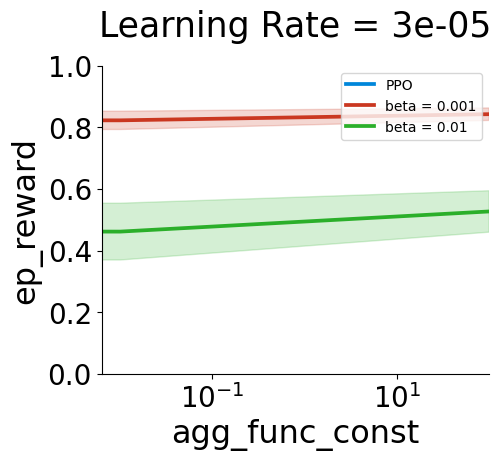

('minigrid-door-key-stochastic', 0.0003, 0.0003)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
116          vqvae           True  0.00            256   True   
117          vqvae           True  0.00            256   True   
118          vqvae           True  0.00            256   True   
119          vqvae           True  0.00            256   True   
120          vqvae           True  0.00            256   True   
...            ...            ...   ...            ...    ...   
1785         vqvae           True  0.01            256   True   
1786         vqvae           True  0.01            256   True   
1787         vqvae           True  0.01            256   True   
1788         vqvae           True  0.01            256   True   
1789         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
116   minigrid-door-key-stochastic            6         0.0003         500000   
117   mi

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/4023180861.py:51: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


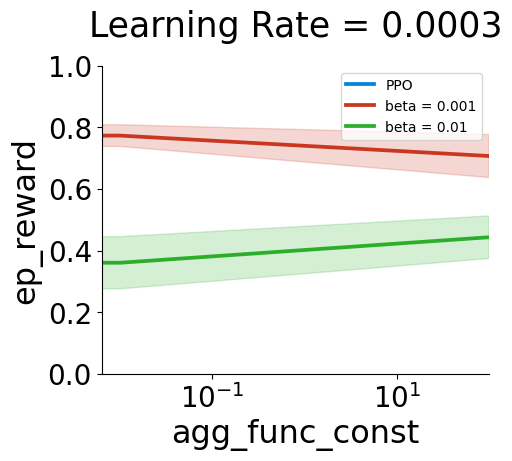

('minigrid-door-key-stochastic', 0.003, 0.0003)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
230          vqvae           True  0.00            256   True   
231          vqvae           True  0.00            256   True   
232          vqvae           True  0.00            256   True   
233          vqvae           True  0.00            256   True   
234          vqvae           True  0.00            256   True   
...            ...            ...   ...            ...    ...   
2123         vqvae           True  0.01            256   True   
2124         vqvae           True  0.01            256   True   
2125         vqvae           True  0.01            256   True   
2126         vqvae           True  0.01            256   True   
2127         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
230   minigrid-door-key-stochastic            6          0.003         500000   
231   min

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/4023180861.py:51: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


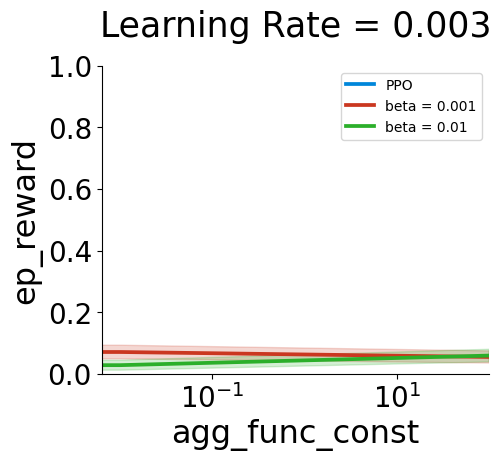

In [241]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}

determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0003])]




set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate', 'ppo_entropy_coef']):
  print(env_name)
  learning_rate = env_name[1]
  env_name = env_name[0]
  print(group)

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['beta']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='agg_func_const', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
    
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate = " + str(learning_rate))



  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100

  plt.xscale('log')


  plt.ylim(0, 1)
  plt.xlim(0, 100)

  plt.legend(loc='upper right')


  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

('minigrid-door-key-stochastic', 3e-05, 0.0)
    ae_model_type  ae_recon_loss  beta  codebook_size  count  \
0           vqvae           True   0.0            256   True   
1           vqvae           True   0.0            256   True   
2           vqvae           True   0.0            256   True   
3           vqvae           True   0.0            256   True   
4           vqvae           True   0.0            256   True   
..            ...            ...   ...            ...    ...   
111         vqvae           True   0.0            256   True   
112         vqvae           True   0.0            256   True   
113         vqvae           True   0.0            256   True   
114         vqvae           True   0.0            256   True   
115         vqvae           True   0.0            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
0    minigrid-door-key-stochastic            6        0.00003         500000   
1    minigrid-door-key-sto

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


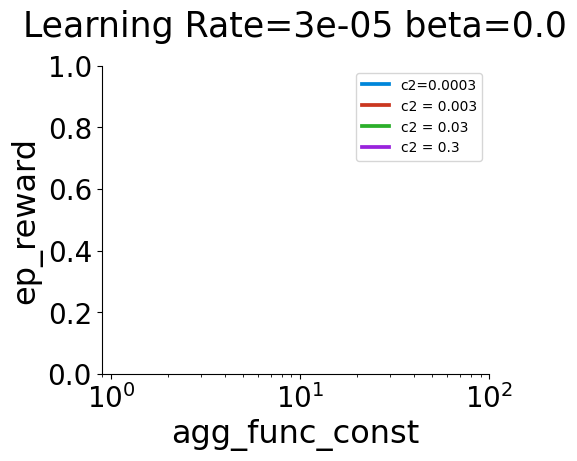

('minigrid-door-key-stochastic', 3e-05, 0.001)
    ae_model_type  ae_recon_loss   beta  codebook_size  count  \
346         vqvae           True  0.001            256   True   
347         vqvae           True  0.001            256   True   
348         vqvae           True  0.001            256   True   
349         vqvae           True  0.001            256   True   
350         vqvae           True  0.001            256   True   
..            ...            ...    ...            ...    ...   
689         vqvae           True  0.001            256   True   
690         vqvae           True  0.001            256   True   
691         vqvae           True  0.001            256   True   
692         vqvae           True  0.001            256   True   
693         vqvae           True  0.001            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
346  minigrid-door-key-stochastic            6        0.00003         500000   
347  minigri

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


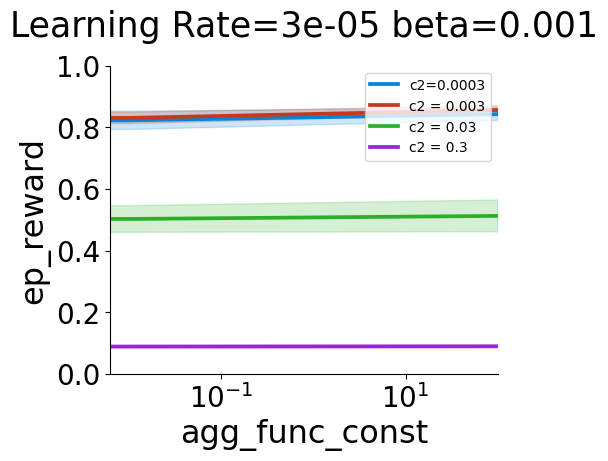

('minigrid-door-key-stochastic', 3e-05, 0.01)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
1350         vqvae           True  0.01            256   True   
1351         vqvae           True  0.01            256   True   
1352         vqvae           True  0.01            256   True   
1353         vqvae           True  0.01            256   True   
1354         vqvae           True  0.01            256   True   
...            ...            ...   ...            ...    ...   
1701         vqvae           True  0.01            256   True   
1702         vqvae           True  0.01            256   True   
1703         vqvae           True  0.01            256   True   
1704         vqvae           True  0.01            256   True   
1705         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
1350  minigrid-door-key-stochastic            6        0.00003         500000   
1351  minig

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


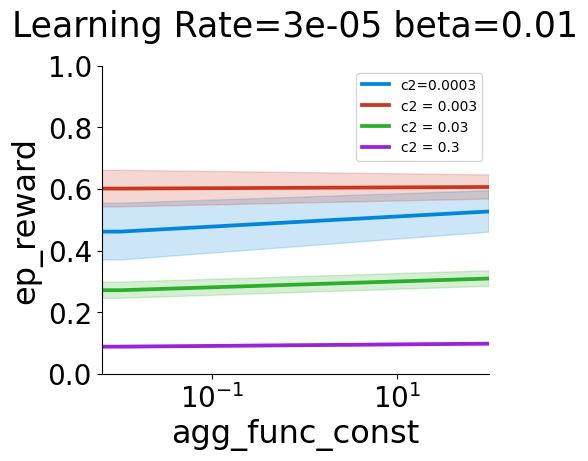

('minigrid-door-key-stochastic', 0.0003, 0.0)
    ae_model_type  ae_recon_loss  beta  codebook_size  count  \
116         vqvae           True   0.0            256   True   
117         vqvae           True   0.0            256   True   
118         vqvae           True   0.0            256   True   
119         vqvae           True   0.0            256   True   
120         vqvae           True   0.0            256   True   
..            ...            ...   ...            ...    ...   
225         vqvae           True   0.0            256   True   
226         vqvae           True   0.0            256   True   
227         vqvae           True   0.0            256   True   
228         vqvae           True   0.0            256   True   
229         vqvae           True   0.0            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
116  minigrid-door-key-stochastic            6         0.0003         500000   
117  minigrid-door-key-st

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


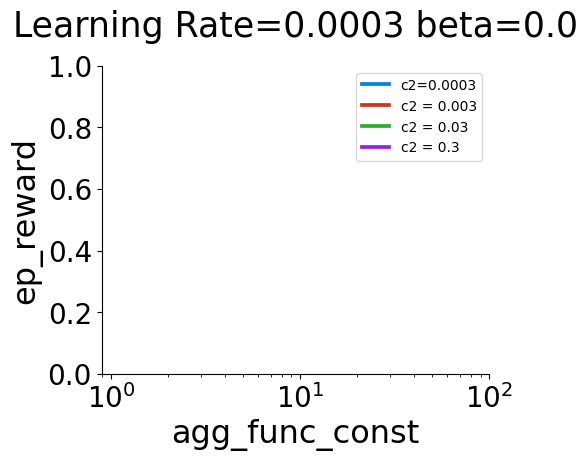

('minigrid-door-key-stochastic', 0.0003, 0.001)
     ae_model_type  ae_recon_loss   beta  codebook_size  count  \
694          vqvae           True  0.001            256   True   
695          vqvae           True  0.001            256   True   
696          vqvae           True  0.001            256   True   
697          vqvae           True  0.001            256   True   
698          vqvae           True  0.001            256   True   
...            ...            ...    ...            ...    ...   
1032         vqvae           True  0.001            256   True   
1033         vqvae           True  0.001            256   True   
1034         vqvae           True  0.001            256   True   
1035         vqvae           True  0.001            256   True   
1036         vqvae           True  0.001            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
694   minigrid-door-key-stochastic            6         0.0003         500000 

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


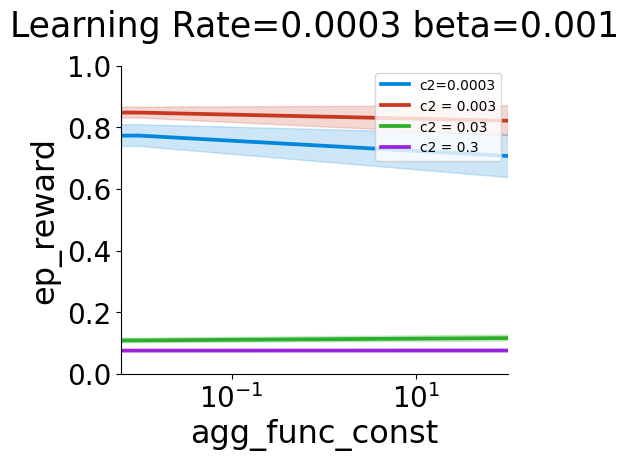

('minigrid-door-key-stochastic', 0.0003, 0.01)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
1706         vqvae           True  0.01            256   True   
1707         vqvae           True  0.01            256   True   
1708         vqvae           True  0.01            256   True   
1709         vqvae           True  0.01            256   True   
1710         vqvae           True  0.01            256   True   
...            ...            ...   ...            ...    ...   
2038         vqvae           True  0.01            256   True   
2039         vqvae           True  0.01            256   True   
2040         vqvae           True  0.01            256   True   
2041         vqvae           True  0.01            256   True   
2042         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
1706  minigrid-door-key-stochastic            6         0.0003         500000   
1707  mini

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


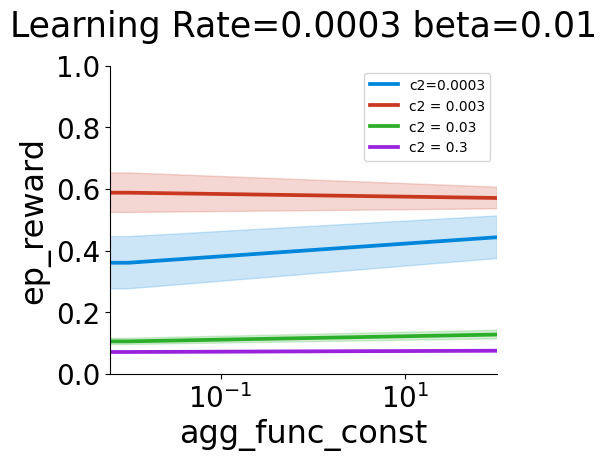

('minigrid-door-key-stochastic', 0.003, 0.0)
    ae_model_type  ae_recon_loss  beta  codebook_size  count  \
230         vqvae           True   0.0            256   True   
231         vqvae           True   0.0            256   True   
232         vqvae           True   0.0            256   True   
233         vqvae           True   0.0            256   True   
234         vqvae           True   0.0            256   True   
..            ...            ...   ...            ...    ...   
341         vqvae           True   0.0            256   True   
342         vqvae           True   0.0            256   True   
343         vqvae           True   0.0            256   True   
344         vqvae           True   0.0            256   True   
345         vqvae           True   0.0            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
230  minigrid-door-key-stochastic            6          0.003         500000   
231  minigrid-door-key-sto

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


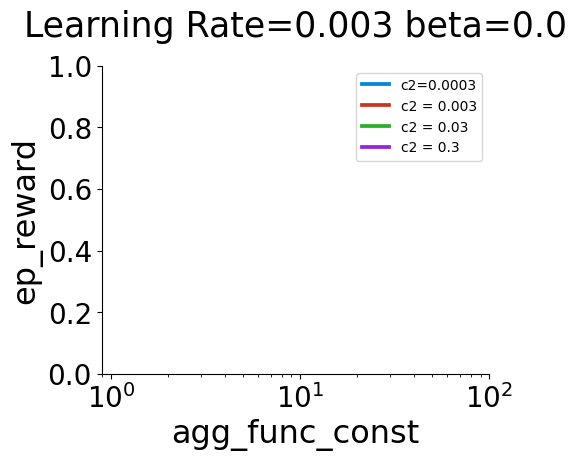

('minigrid-door-key-stochastic', 0.003, 0.001)
     ae_model_type  ae_recon_loss   beta  codebook_size  count  \
1037         vqvae           True  0.001            256   True   
1038         vqvae           True  0.001            256   True   
1039         vqvae           True  0.001            256   True   
1040         vqvae           True  0.001            256   True   
1041         vqvae           True  0.001            256   True   
...            ...            ...    ...            ...    ...   
1345         vqvae           True  0.001            256   True   
1346         vqvae           True  0.001            256   True   
1347         vqvae           True  0.001            256   True   
1348         vqvae           True  0.001            256   True   
1349         vqvae           True  0.001            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
1037  minigrid-door-key-stochastic            6          0.003         500000  

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


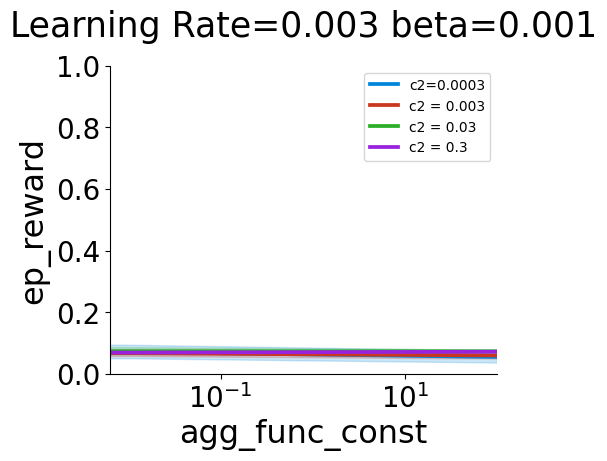

('minigrid-door-key-stochastic', 0.003, 0.01)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
2043         vqvae           True  0.01            256   True   
2044         vqvae           True  0.01            256   True   
2045         vqvae           True  0.01            256   True   
2046         vqvae           True  0.01            256   True   
2047         vqvae           True  0.01            256   True   
...            ...            ...   ...            ...    ...   
2380         vqvae           True  0.01            256   True   
2381         vqvae           True  0.01            256   True   
2382         vqvae           True  0.01            256   True   
2383         vqvae           True  0.01            256   True   
2384         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
2043  minigrid-door-key-stochastic            6          0.003         500000   
2044  minig

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


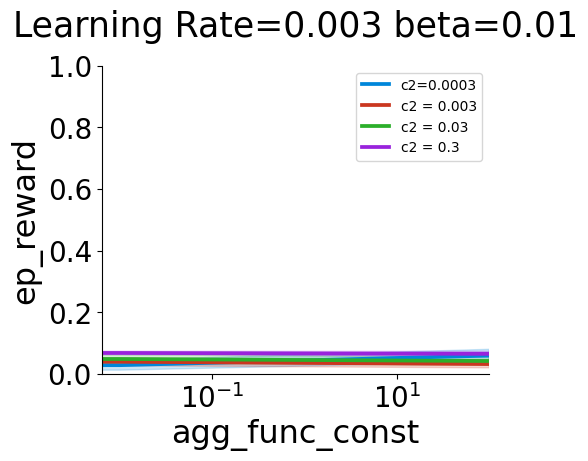

In [242]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}
label_map = {0.3: "c2 = 0.3", 0.03: "c2 = 0.03", 0.003: "c2 = 0.003", 0.0003: "c2=0.0003"}

determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
# determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0003])]




set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate', 'beta']):
  print(env_name)
  learning_rate = env_name[1]
  beta = env_name[2]
  env_name = env_name[0]
  print(group)

  group['entropy_label'] = group['ppo_entropy_coef'].map(label_map)
  hue_labels = group['entropy'].apply(lambda x: f'{x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['ppo_entropy_coef']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='agg_func_const', y='ep_reward', hue='entropy_label',
    errorbar=t_distrib, palette=color_palette)
    
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate=" + str(learning_rate) + " beta="+ str(beta))



  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100

  plt.xscale('log')


  plt.ylim(0, 1)
  plt.xlim(0, 100)

  plt.legend(loc='upper right')


  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

In [243]:
data_path = 'data/model-free-minigrid-short-all-params_data.csv'
df = pd.read_csv(data_path, index_col=0)
df['Model Type'] = df['ae_model_type']


model_type_map = {
  'ae': 'Continuous',
  'vqvae': 'Discrete',
  'fta_ae': 'FTA',
  'softmax_ae': 'Softmax AE',
}
df['Model Type'] = df['Model Type'].apply(lambda x: model_type_map[x])
df['Model Type'] = df.apply(
  (lambda x: x['Model Type'] if x['ae_recon_loss'] else 'End-to-End'), axis=1)

# Remove all softmax
df = df[df['ae_model_type'] != 'softmax_ae']

df

,step,ep_length,ep_reward,reward,entropy,ae_model_type,ae_recon_loss,agg_func_const,beta,codebook_size,count,env_name,filter_size,learning_rate,ppo_entropy_coef,rl_start_step,experiment_key,Model Type
0,10000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
1,20000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
2,30000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
3,40000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
4,50000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353763,1460000,100.0,0.0,0.0,2.256366,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00300,0.3000,500000,d4a9d92c1c854f52a5f0447e6151e729,Discrete
353764,1470000,100.0,0.0,0.0,2.224241,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00300,0.3000,500000,d4a9d92c1c854f52a5f0447e6151e729,Discrete
353765,1480000,100.0,0.0,0.0,2.228110,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00300,0.3000,500000,d4a9d92c1c854f52a5f0447e6151e729,Discrete
353766,1490000,100.0,0.0,0.0,2.277240,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00300,0.3000,500000,d4a9d92c1c854f52a5f0447e6151e729,Discrete


In [244]:
# df = df.drop('experiment_key', axis=1)
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const', 'experiment_key']

df = df[df['step'] >= 500000]

average_df = df.groupby(params, as_index=False).mean()

average_df

,ae_model_type,ae_recon_loss,beta,codebook_size,count,env_name,filter_size,learning_rate,rl_start_step,Model Type,ppo_entropy_coef,agg_func_const,experiment_key,step,ep_length,ep_reward,reward,entropy
0,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,115df92ca6784ef99663ed69f24896a9,1000000.0,99.936208,0.000818,0.000008,2.279472
1,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,182ef478b54248ff971367764f6d484f,1000000.0,77.869965,0.228018,0.010027,2.345553
2,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,1a664d33a9ac42e48568194cf0cc8079,1000000.0,40.172931,0.613814,0.030130,2.501988
3,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,1c9fd0ff13e54f70a81cebb18141a8b1,990000.0,85.385976,0.151652,0.005730,2.358719
4,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.0,1d6a75026c8c496f8a18a303ac41bbec,1000000.0,99.976493,0.000340,0.000003,2.303099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,c3c846dd15e14ea1bb5821a287624a4e,1000000.0,99.992277,0.000109,0.000235,2.275780
2442,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,ca7be641d77a4ebb8212f15450c28714,965000.0,99.989278,0.000150,0.003531,2.286141
2443,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,d4231854cd4648498bff7493eb3f79d4,1000000.0,99.997525,0.000052,0.000235,2.282527
2444,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.00300,500000,Discrete,0.3000,100.0,e96c9c03059c4bdc9f9ed761b9da778c,1000000.0,99.993861,0.000115,0.000235,2.284943


('minigrid-door-key-stochastic', 3e-05)
3e-05


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/3255474521.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


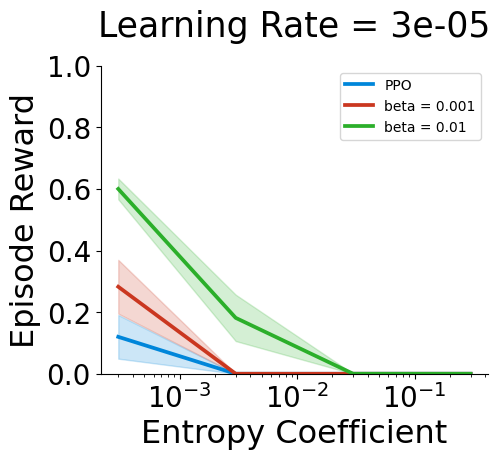

('minigrid-door-key-stochastic', 0.0003)
0.0003


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/3255474521.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


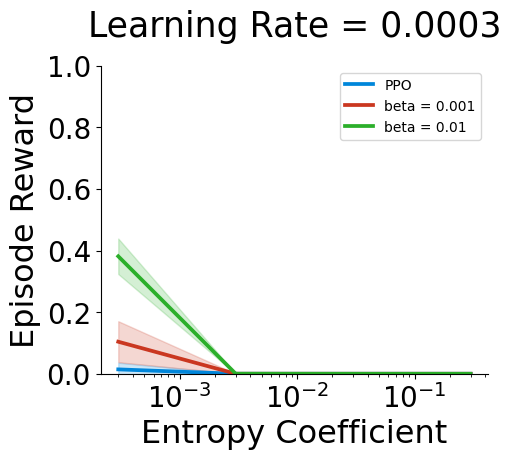

('minigrid-door-key-stochastic', 0.003)
0.003


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/3255474521.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


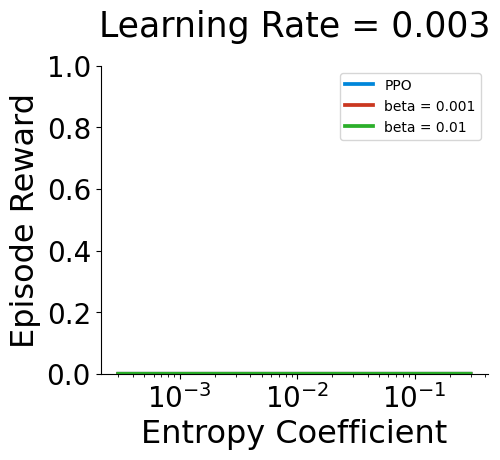

In [245]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}

determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.0001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['agg_func_const'].isin([0.0]) |
                               (determ_env_df['agg_func_const'].isin([0.0]) & determ_env_df['beta'].isin([0.0]))]


set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate']):
  print(env_name)
  learning_rate = env_name[1]
  print(learning_rate)
  env_name = env_name[0]

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['beta']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='ppo_entropy_coef', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate = " + str(learning_rate))
  # set_fig_labels('Time Steps', 'Episode Length', xsci=True)
  plt.xscale('log')

  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, 1)
  plt.xlim(0, )

  plt.ylabel("Episode Reward")
  plt.xlabel("Entropy Coefficient")
   
  plt.legend(loc='upper right')



  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

('minigrid-door-key-stochastic', 3e-05, 0.0)
    ae_model_type  ae_recon_loss  beta  codebook_size  count  \
0           vqvae           True   0.0            256   True   
1           vqvae           True   0.0            256   True   
2           vqvae           True   0.0            256   True   
3           vqvae           True   0.0            256   True   
4           vqvae           True   0.0            256   True   
..            ...            ...   ...            ...    ...   
110         vqvae           True   0.0            256   True   
111         vqvae           True   0.0            256   True   
112         vqvae           True   0.0            256   True   
113         vqvae           True   0.0            256   True   
114         vqvae           True   0.0            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
0    minigrid-door-key-stochastic            6        0.00003         500000   
1    minigrid-door-key-sto

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


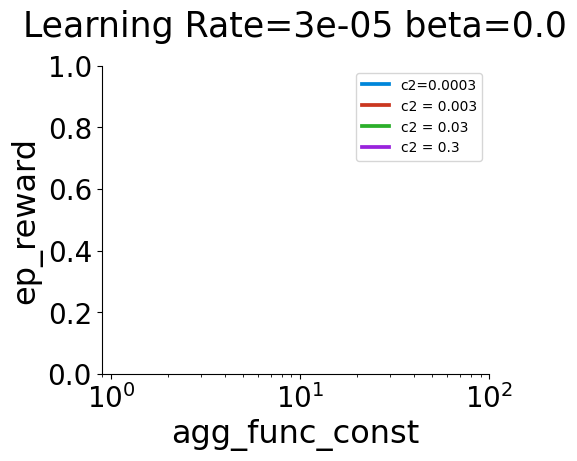

('minigrid-door-key-stochastic', 3e-05, 0.001)
    ae_model_type  ae_recon_loss   beta  codebook_size  count  \
355         vqvae           True  0.001            256   True   
356         vqvae           True  0.001            256   True   
357         vqvae           True  0.001            256   True   
358         vqvae           True  0.001            256   True   
359         vqvae           True  0.001            256   True   
..            ...            ...    ...            ...    ...   
697         vqvae           True  0.001            256   True   
698         vqvae           True  0.001            256   True   
699         vqvae           True  0.001            256   True   
700         vqvae           True  0.001            256   True   
701         vqvae           True  0.001            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
355  minigrid-door-key-stochastic            6        0.00003         500000   
356  minigri

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


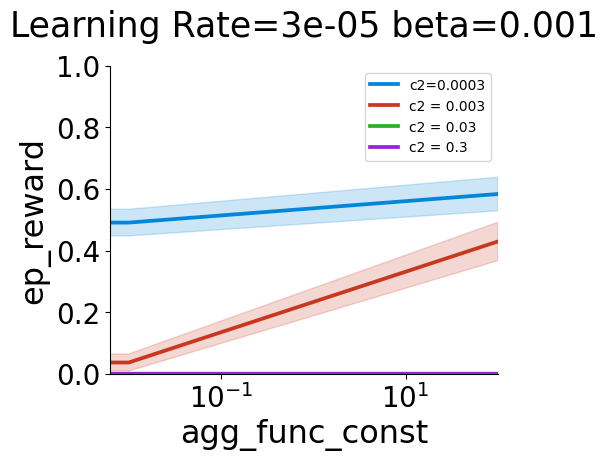

('minigrid-door-key-stochastic', 3e-05, 0.01)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
1406         vqvae           True  0.01            256   True   
1407         vqvae           True  0.01            256   True   
1408         vqvae           True  0.01            256   True   
1409         vqvae           True  0.01            256   True   
1410         vqvae           True  0.01            256   True   
...            ...            ...   ...            ...    ...   
1742         vqvae           True  0.01            256   True   
1743         vqvae           True  0.01            256   True   
1744         vqvae           True  0.01            256   True   
1745         vqvae           True  0.01            256   True   
1746         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
1406  minigrid-door-key-stochastic            6        0.00003         500000   
1407  minig

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


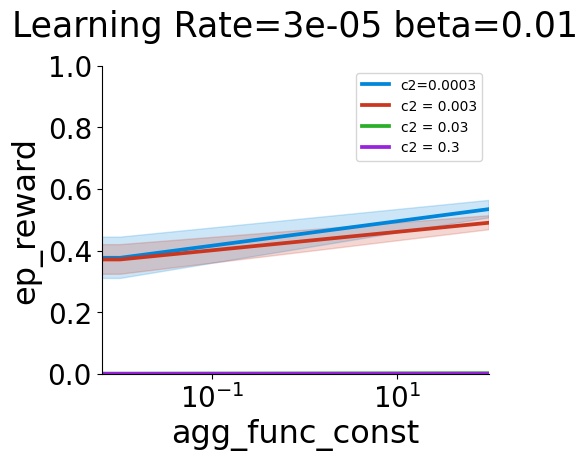

('minigrid-door-key-stochastic', 0.0003, 0.0)
    ae_model_type  ae_recon_loss  beta  codebook_size  count  \
115         vqvae           True   0.0            256   True   
116         vqvae           True   0.0            256   True   
117         vqvae           True   0.0            256   True   
118         vqvae           True   0.0            256   True   
119         vqvae           True   0.0            256   True   
..            ...            ...   ...            ...    ...   
230         vqvae           True   0.0            256   True   
231         vqvae           True   0.0            256   True   
232         vqvae           True   0.0            256   True   
233         vqvae           True   0.0            256   True   
234         vqvae           True   0.0            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
115  minigrid-door-key-stochastic            6         0.0003         500000   
116  minigrid-door-key-st

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


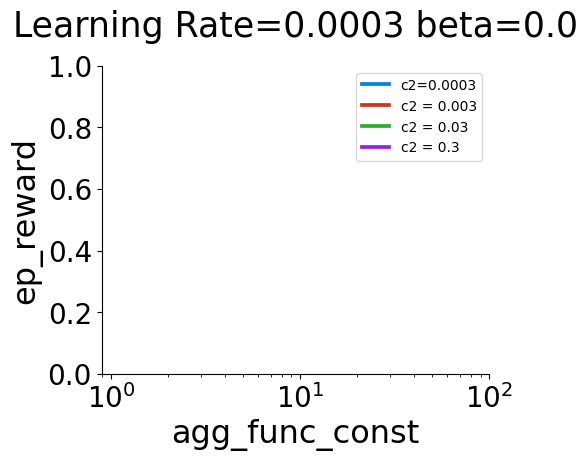

('minigrid-door-key-stochastic', 0.0003, 0.001)
     ae_model_type  ae_recon_loss   beta  codebook_size  count  \
702          vqvae           True  0.001            256   True   
703          vqvae           True  0.001            256   True   
704          vqvae           True  0.001            256   True   
705          vqvae           True  0.001            256   True   
706          vqvae           True  0.001            256   True   
...            ...            ...    ...            ...    ...   
1049         vqvae           True  0.001            256   True   
1050         vqvae           True  0.001            256   True   
1051         vqvae           True  0.001            256   True   
1052         vqvae           True  0.001            256   True   
1053         vqvae           True  0.001            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
702   minigrid-door-key-stochastic            6         0.0003         500000 

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


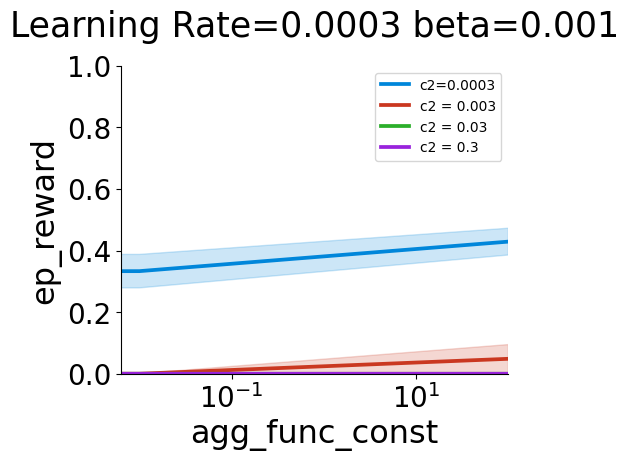

('minigrid-door-key-stochastic', 0.0003, 0.01)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
1747         vqvae           True  0.01            256   True   
1748         vqvae           True  0.01            256   True   
1749         vqvae           True  0.01            256   True   
1750         vqvae           True  0.01            256   True   
1751         vqvae           True  0.01            256   True   
...            ...            ...   ...            ...    ...   
2093         vqvae           True  0.01            256   True   
2094         vqvae           True  0.01            256   True   
2095         vqvae           True  0.01            256   True   
2096         vqvae           True  0.01            256   True   
2097         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
1747  minigrid-door-key-stochastic            6         0.0003         500000   
1748  mini

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


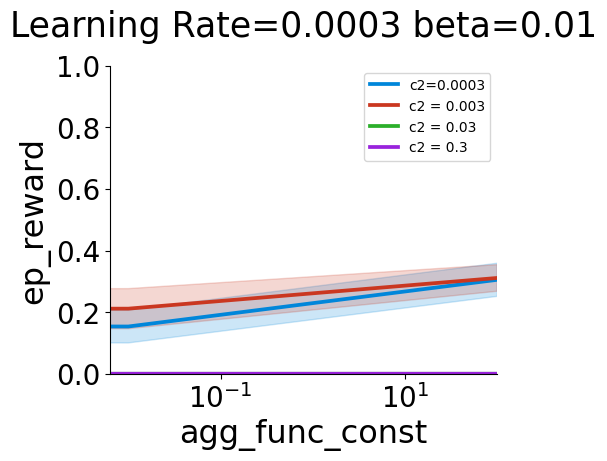

('minigrid-door-key-stochastic', 0.003, 0.0)
    ae_model_type  ae_recon_loss  beta  codebook_size  count  \
235         vqvae           True   0.0            256   True   
236         vqvae           True   0.0            256   True   
237         vqvae           True   0.0            256   True   
238         vqvae           True   0.0            256   True   
239         vqvae           True   0.0            256   True   
..            ...            ...   ...            ...    ...   
350         vqvae           True   0.0            256   True   
351         vqvae           True   0.0            256   True   
352         vqvae           True   0.0            256   True   
353         vqvae           True   0.0            256   True   
354         vqvae           True   0.0            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
235  minigrid-door-key-stochastic            6          0.003         500000   
236  minigrid-door-key-sto

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


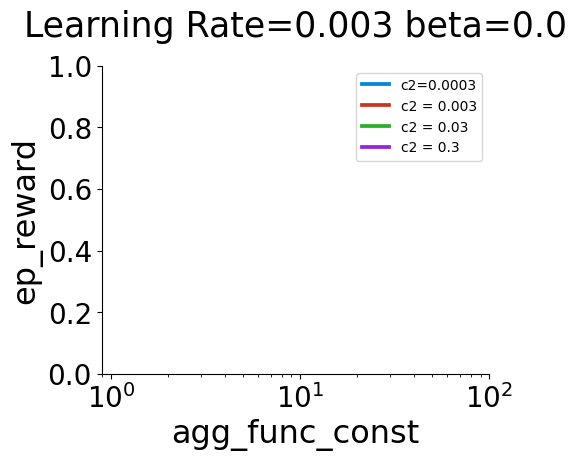

('minigrid-door-key-stochastic', 0.003, 0.001)
     ae_model_type  ae_recon_loss   beta  codebook_size  count  \
1054         vqvae           True  0.001            256   True   
1055         vqvae           True  0.001            256   True   
1056         vqvae           True  0.001            256   True   
1057         vqvae           True  0.001            256   True   
1058         vqvae           True  0.001            256   True   
...            ...            ...    ...            ...    ...   
1401         vqvae           True  0.001            256   True   
1402         vqvae           True  0.001            256   True   
1403         vqvae           True  0.001            256   True   
1404         vqvae           True  0.001            256   True   
1405         vqvae           True  0.001            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
1054  minigrid-door-key-stochastic            6          0.003         500000  

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


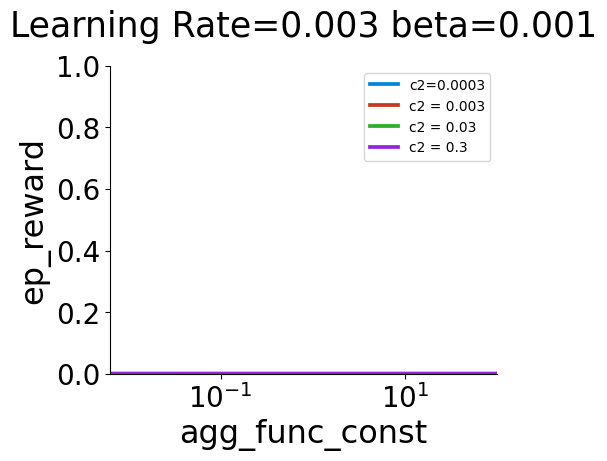

('minigrid-door-key-stochastic', 0.003, 0.01)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
2098         vqvae           True  0.01            256   True   
2099         vqvae           True  0.01            256   True   
2100         vqvae           True  0.01            256   True   
2101         vqvae           True  0.01            256   True   
2102         vqvae           True  0.01            256   True   
...            ...            ...   ...            ...    ...   
2441         vqvae           True  0.01            256   True   
2442         vqvae           True  0.01            256   True   
2443         vqvae           True  0.01            256   True   
2444         vqvae           True  0.01            256   True   
2445         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
2098  minigrid-door-key-stochastic            6          0.003         500000   
2099  minig

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


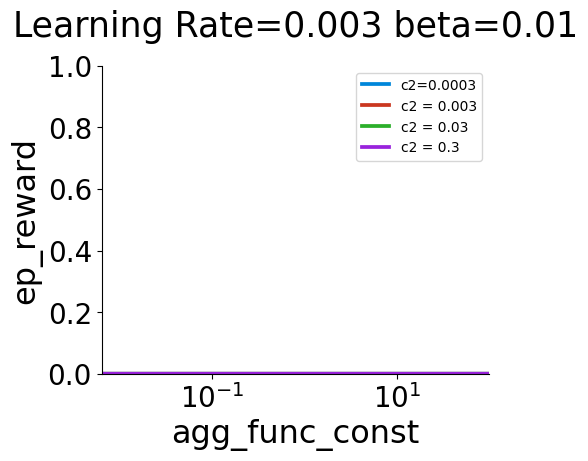

In [246]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}
label_map = {0.3: "c2 = 0.3", 0.03: "c2 = 0.03", 0.003: "c2 = 0.003", 0.0003: "c2=0.0003"}

determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
# determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0003])]




set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate', 'beta']):
  print(env_name)
  learning_rate = env_name[1]
  beta = env_name[2]
  env_name = env_name[0]
  print(group)

  group['entropy_label'] = group['ppo_entropy_coef'].map(label_map)
  hue_labels = group['entropy'].apply(lambda x: f'{x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['ppo_entropy_coef']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='agg_func_const', y='ep_reward', hue='entropy_label',
    errorbar=t_distrib, palette=color_palette)
    
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate=" + str(learning_rate) + " beta="+ str(beta))



  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100

  plt.xscale('log')


  plt.ylim(0, 1)
  plt.xlim(0, 100)

  plt.legend(loc='upper right')


  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()